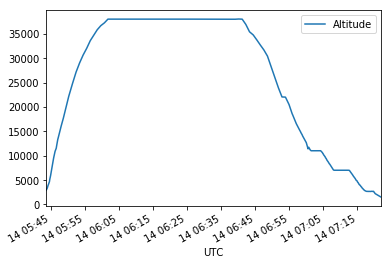

In [1]:
import pandas as pd
from operator import itemgetter

# csv format from FlightRadar24
flight = pd.read_csv("../data/20171214_KL1300_(fd43298).csv", parse_dates=['UTC'])
flight['lat'] = flight.Position.str.split(",").apply(itemgetter(0)).astype(float)
flight['lon'] = flight.Position.str.split(",").apply(itemgetter(1)).astype(float)

%matplotlib inline
flight.plot(x='UTC', y='Altitude')

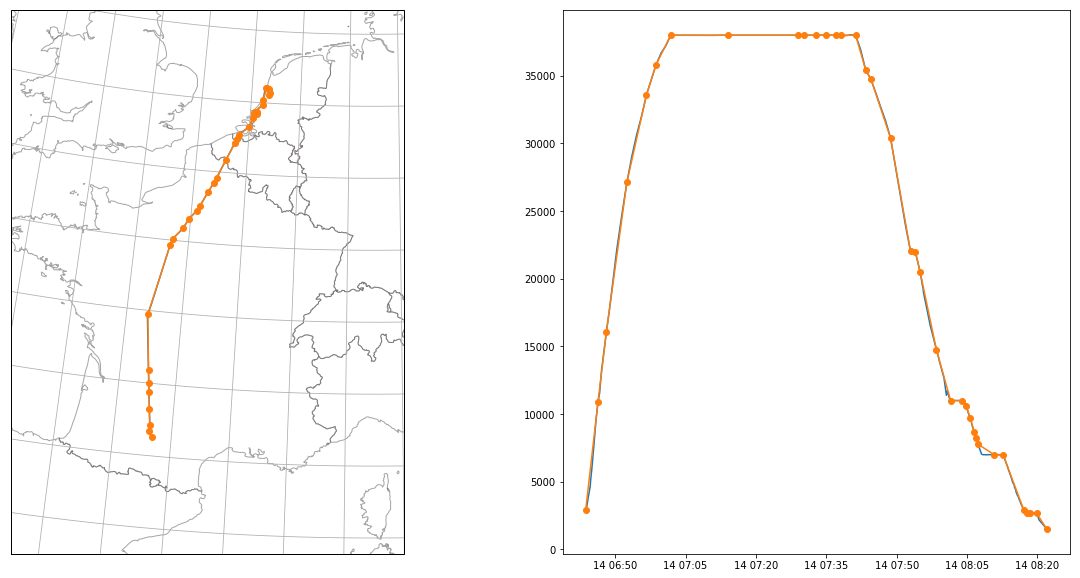

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from traffic.tools import douglas_peucker
from datetime import datetime

from cartopy.crs import EuroPP, PlateCarree
from cartopy.feature import NaturalEarthFeature

countries = NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='10m',
    edgecolor='#524c50',
    facecolor='none',
    alpha=.5)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection=EuroPP())

ax.add_feature(countries)
ax.gridlines()
ax.set_extent((-3, 10, 41, 54))

dp = douglas_peucker(df=flight, lon='lon', lat='lat', z='Altitude', tolerance=1e3)

ax.plot(flight.lon, flight.lat, transform=PlateCarree())
ax.plot(flight[dp].lon, flight[dp].lat, '-o', transform=PlateCarree())

ax1 = fig.add_subplot(122)
ax1.plot(flight.Timestamp.apply(datetime.fromtimestamp), flight.Altitude)
ax1.plot(flight[dp].Timestamp.apply(datetime.fromtimestamp), flight[dp].Altitude, '-o');